# Fundamentals of Visualization Libraries Part 2 (Seaborn) 

Questions:
- Which stations attract the highest ridership in the city?
- During which months is trip activity at its peak? Does the weather influence travel patterns?
- What are the most common station-to-station routes?
- How evenly are stations spread across the network?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import os
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_pickle(r"C:\Users\ZenBook\NY_data_merged.pkl")

In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'temp_max', 'temp_min',
       'total_precipitation', 'wind_speed', '_merge'],
      dtype='object')

In [4]:
df.drop(columns = {'_merge'}, inplace = True)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,temp_max,temp_min,total_precipitation,wind_speed
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802116,-73.968178,40.804039,-73.945923,member,2022-01-21,-6.0,-4.9,-9.3,0.0,6.2
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673744,-73.985649,40.688488,-73.991158,member,2022-01-10,1.6,5.6,-3.2,0.0,7.5
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960938,40.745167,-73.986832,member,2022-01-26,-2.3,-1.0,-6.0,0.0,5.6
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783962,-73.947166,40.745167,-73.986832,member,2022-01-03,1.4,3.9,-4.3,0.0,6.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749641,-73.988052,40.745167,-73.986832,member,2022-01-22,-5.9,-1.0,-9.9,0.0,3.4


In [6]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name        40
start_station_id          40
end_station_name       41038
end_station_id         41038
start_lat                  0
start_lng                  0
end_lat                22369
end_lng                22369
member_casual              0
date                       0
avgTemp                  621
temp_max                 621
temp_min                 621
total_precipitation      621
wind_speed               621
dtype: int64

In [7]:
df.dtypes

ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id             category
end_station_name             category
end_station_id               category
start_lat                     float32
start_lng                     float32
end_lat                       float32
end_lng                       float32
member_casual                category
date                   datetime64[ns]
avgTemp                       float64
temp_max                      float64
temp_min                      float64
total_precipitation           float64
wind_speed                    float64
dtype: object

In [8]:
# Clean both start and end station names from hidden or unwanted characters

for col in ['start_station_name', 'end_station_name']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("'", '', regex=False)          # remove single quotation marks
        .str.replace(r'[\n\t\r]+', ' ', regex=True)  # remove line breaks, tabs, and carriage returns
        .str.replace(r'\s+', ' ', regex=True)        # replace multiple spaces with a single one
        .str.strip()                                 # remove leading and trailing spaces
    )

## Set global theme for all seaborn plots

In [9]:
sns.set_style("ticks")
palette = sns.color_palette('crest_r', n_colors=20)
sns.set_palette(palette)

## Which stations attract the highest ridership in the city?

In [10]:
df['value'] = 1

In [11]:
df_top_start = df.groupby('start_station_name')['value'].count().reset_index()

In [12]:
df_top_start

,start_station_name,value
0,1 Ave & E 110 St,9609
1,1 Ave & E 16 St,27537
2,1 Ave & E 18 St,29602
3,1 Ave & E 30 St,17581
4,1 Ave & E 39 St,22517
...,...,...
1752,Wyckoff St & 3 Ave,154
1753,Wyckoff St & Nevins St,4304
1754,Wythe Ave & Metropolitan Ave,27490
1755,Yankee Ferry Terminal,4868


In [13]:
top20 = df_top_start.nlargest(20, 'value')

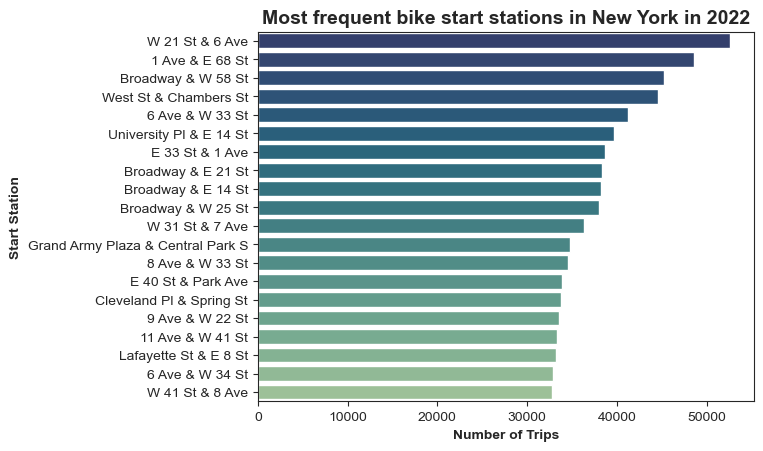

In [14]:
sns.barplot(
    data=top20,
    x='value',
    y='start_station_name',
    hue='start_station_name')

plt.title("Most frequent bike start stations in New York in 2022", fontsize=14, weight='bold')
plt.xlabel("Number of Trips", fontsize=10, weight='bold')
plt.ylabel("Start Station", fontsize=10, weight='bold')
plt.show()

The chart highlights the start stations with the most bike trips, showing a clear concentration of activity at a handful of central locations. The busiest stations are **W 21 St & 6 Ave, 1 Ave & E 68 St, and Broadway & W 58 St**. Overall, start‑station activity is heavily concentrated in central Manhattan, where a handful of major departure points consistently generate the highest volumes of City Bike trips.

## Dual-axis line plot Daily Bike Trips vs Average Daily Temperature (Seaborn)

In [15]:
# Creating daily aggregation
df_daily = df.groupby('date').agg({
    'ride_id': 'count',
    'avgTemp': 'mean'
}).reset_index()

# Renaming for clarity
df_daily.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

# Setting date as index (optional)
df_daily.set_index('date', inplace=True)

In [16]:
# Ensure df_daily is sorted by date
df_daily = df_daily.sort_index()

# Filter to 2022 only
df_daily = df_daily.loc["2022-01-01":"2022-12-31"]

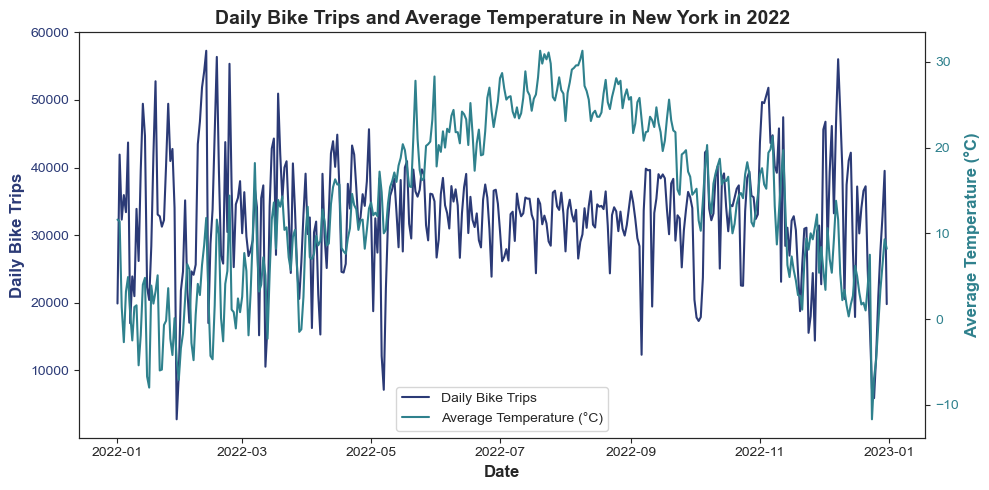

In [17]:
# Create dual-axis plot
fig, ax = plt.subplots(figsize=(10, 5))

# Sort dataframe by date
df = df.sort_index()

# Primary y-axis: Daily trips
sns.lineplot(
    data=df_daily,
    x=df_daily.index,
    y='bike_rides_daily',
    label='Daily Bike Trips',
    color=palette[0],
    ax=ax
)
ax.set_xlabel('Date', fontsize=12, weight='bold')
ax.set_ylabel('Daily Bike Trips', color=palette[0], fontsize=12, weight='bold')
ax.tick_params(axis='y', labelcolor=palette[0])

# Secondary y-axis: Temperature
ax2 = ax.twinx()
sns.lineplot(
    data=df_daily,
    x=df_daily.index,
    y='avgTemp',
    color=palette[9],
    ax=ax2,
    label='Average Temperature (°C)',
    legend=False
)
ax2.set_ylabel('Average Temperature (°C)', color=palette[9], fontsize=12, weight='bold')
ax2.tick_params(axis='y', labelcolor=palette[9])

# Title
ax.set_title("Daily Bike Trips and Average Temperature in New York in 2022", fontsize=14, weight='bold')

# Legend (combine both axes)
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='lower center')

plt.tight_layout()
plt.show()

# During which months is trip activity at its peak? Does the weather influence travel patterns?

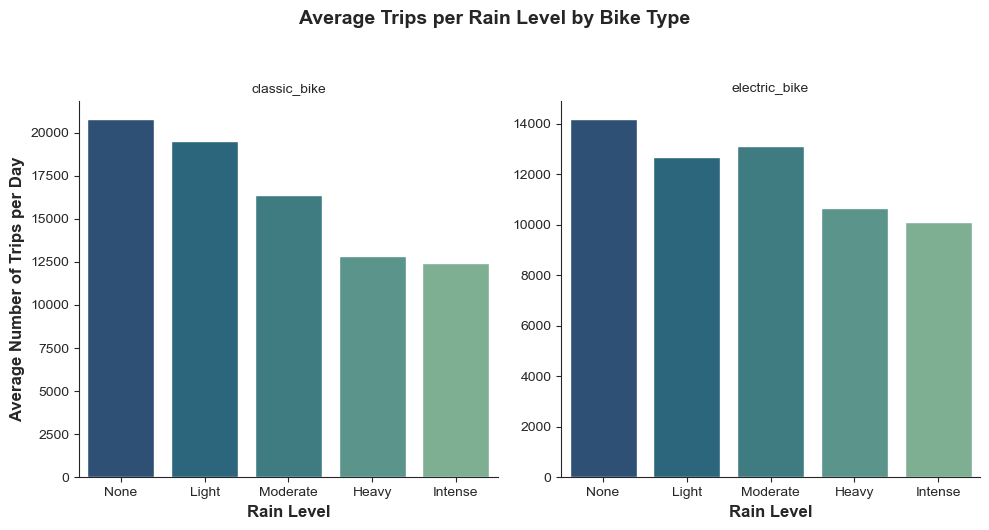

In [18]:
# Define rain level bins
bins = [0, 1, 5, 10, 20, 50]
labels = ['None', 'Light', 'Moderate', 'Heavy', 'Intense']

# Aggregate daily trips per bike type
daily_trips = (
    df.groupby(['rideable_type', 'date'], observed=False)
      .agg({'value': 'sum', 'total_precipitation': 'mean'})
      .reset_index()
)

# Assign each day to a rain level category
daily_trips['rain_level'] = pd.cut(
    daily_trips['total_precipitation'],
    bins=bins, labels=labels, right=False
)

# Calculate average trips per rain level
rain_stats = (
    daily_trips.groupby(['rideable_type', 'rain_level'], observed=False)['value'] 
    .mean()
    .reset_index()
)

# Visualization
g = sns.catplot(
    data=rain_stats,
    x='rain_level', y='value',
    col='rideable_type',
    kind='bar',
    col_wrap=2,
    sharey=False,
    hue='rain_level',       
    legend=False,           
    palette='crest_r'
)

# Titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Rain Level", "Average Number of Trips per Day", fontsize=12, weight='bold')
plt.suptitle("Average Trips per Rain Level by Bike Type", y=1.05, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Classic bikes display far more pronounced seasonal shifts, suggesting that traditional models react more strongly to changing weather conditions than electric‑bike users. 

At the height of summer, classic bikes surge to almost double the daily usage of electric bikes, reaching roughly 90,000 rides compared with about 50,000. Once winter arrives, both bike types settle into a similar activity range of around 20,000–35,000 rides, though electric bikes follow a noticeably smoother seasonal pattern. Their steadier year‑round performance likely reflects the comfort provided by motor assistance, which makes less‑ideal conditions easier to handle. 

Periods of Heavy and Intense precipitation often coincide with drops in ridership for both categories, but the decline is more evident among classic bike users.

In [19]:
# Create a month column
df['month'] = df['started_at'].dt.month_name()

In [20]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'temp_max', 'temp_min',
       'total_precipitation', 'wind_speed', 'value', 'month'],
      dtype='object')

In [21]:
# Busiest month by ride count
busiest_month = df['month'].value_counts().sort_values(ascending=False)

In [22]:
busiest_month

month
December     1000440
August       1000167
April        1000116
September    1000114
November     1000101
March        1000063
June         1000036
May           999973
February      999964
July          999901
October       999624
January       999501
Name: count, dtype: int64

According to the analysed data, **the greatest number of City Bike trips occurred in December, August and April 2022**, indicating these as the busiest months of the year. 

## What are the most common station-to-station routes?

In [23]:
# Count the number of trips between each start and end station

most_comm_trips = (
    df.groupby(['start_station_name', 'end_station_name'])['ride_id']
      .count()
      .reset_index(name='trip_count')
      .sort_values(by='trip_count', ascending=False)
)

# Display top 10 most frequent trips
top10_trips = most_comm_trips.head(10)
print(top10_trips)

                                   start_station_name  \
565902                       Roosevelt Island Tramway   
396577              Grand Army Plaza & Central Park S   
208957                         Central Park S & 6 Ave   
490574                     McGuinness Blvd & Eagle St   
208246  Central Park North & Adam Clayton Powell Blvd   
72269                                   46 Ave & 5 St   
5993                                  1 Ave & E 68 St   
5122                                  1 Ave & E 62 St   
579161                               Soissons Landing   
14317                                11 Ave & W 41 St   

                                     end_station_name  trip_count  
565902                       Roosevelt Island Tramway        4637  
396577              Grand Army Plaza & Central Park S        3714  
208957                         Central Park S & 6 Ave        3525  
490574                           Vernon Blvd & 50 Ave        2997  
208246  Central Park North & Ada

The data highlights the busiest bike‑share routes of 2022, with many concentrated around iconic destinations such as **Central Park, Grand Army Plaza and the Roosevelt Island Tramway**. Several of the top trips begin and end at the same station, pointing to short recreational rides or convenience loops rather than longer commutes. The prominence of Central Park–area stations underscores the strong role of leisure cycling in overall demand, suggesting that usage is heavily clustered in tourist and recreational zones. These patterns provide useful guidance for prioritizing station upkeep and resource planning in high‑traffic areas.

## Trip Duration by Month (Box Plot)

In [24]:
# Counting ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

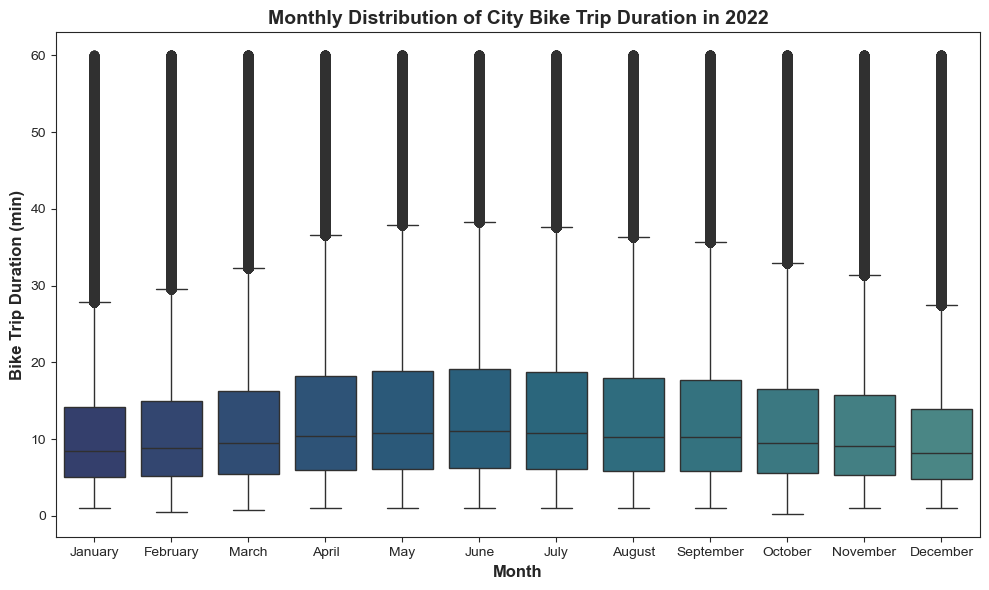

In [25]:
# Creating a box plot of ride duration by month
fig, ax = plt.subplots(figsize=(10, 6))

# Define correct month order (full names)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

# Convert month column to ordered categorical
df['month'] = pd.Categorical(df['month'],
                             categories=month_order,
                             ordered=True)

# Filtering out outliers (negative durations or extremely long rides)
df_filtered = df[(df['ride_duration'] > 0) & (df['ride_duration'] < 60)]

# Creating box plot
sns.boxplot(data=df_filtered, x='month', y='ride_duration', hue='month', ax=ax)
 
# Labels and title
ax.set_xlabel('Month', fontsize=12, weight='bold')
ax.set_ylabel('Bike Trip Duration (min)', fontsize=12, weight='bold')
ax.set_title('Monthly Distribution of City Bike Trip Duration in 2022', fontsize=14, weight='bold')


plt.tight_layout()
plt.show()

In [26]:
summary = df_filtered.groupby('month', observed=False)['ride_duration'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
January,984381.0,11.165548,8.992520,1.000867,5.079233,8.449150,14.174850,59.996050
February,989229.0,11.690160,9.337348,0.530900,5.270233,8.854217,15.005267,59.997850
March,987182.0,12.463014,9.848435,0.819700,5.530521,9.475750,16.252950,59.999333
April,979661.0,13.714451,10.670977,1.001283,6.019117,10.458983,18.252467,59.999800
May,978316.0,14.099988,10.926827,1.001850,6.152050,10.807083,18.865796,59.999867
June,976253.0,14.272451,10.987309,1.000333,6.268717,11.014883,19.091850,59.996433
July,976586.0,14.053541,10.913104,1.001717,6.163550,10.765017,18.756200,59.999883
August,979841.0,13.536061,10.735779,1.000500,5.820733,10.263583,18.002983,59.998517
September,976259.0,13.388958,10.507448,1.001917,5.851700,10.227033,17.763858,59.999367


The box plot reveals clear seasonal shifts in how long people tend to ride. Trip durations gradually lengthen from winter into late spring and early summer, suggesting that warmer weather encourages longer outings. 

Peak activity occurs from **May through July 2022**, when the box plots become noticeably denser and more heavily populated. These months combine higher median ride durations with a larger overall volume of trips, marking the core of the annual demand cycle.

The interquartile ranges (the middle 50% of rides) also widen during the warmer months, indicating greater variability in ride duration.

## How evenly are stations spread across the network?

In [27]:
# Check the geographic spread using latitude/longitude ranges

print("Start stations latitude range:", df['start_lat'].min(), "-", df['start_lat'].max())
print("Start stations longitude range:", df['start_lng'].min(), "-", df['start_lng'].max())

print("Number of unique start stations:", df['start_station_id'].nunique())
print("Number of unique end stations:", df['end_station_id'].nunique())

Start stations latitude range: 40.62736892700195 - 40.88237762451172
Start stations longitude range: -74.02754211425781 - -73.87858581542969
Number of unique start stations: 1749
Number of unique end stations: 1799


In 2022, City Bike stations were spread widely across New York, spanning latitudes from 40.63° to 40.88° and longitudes between –74.03° and –73.88°. This coverage stretches from southern Brooklyn and Jersey City up through northern Manhattan and into the Bronx, reflecting the system’s extensive urban reach.
The network included 1,749 unique start stations and 1,799 end stations. The small difference between these counts suggests that some stations may have been newly added, temporarily inactive, or primarily used as destinations rather than origins. Overall, City Bike’s infrastructure remained densely concentrated in central districts but extended into multiple boroughs, supporting both commuter and recreational cycling across the city.

## FacetGrid for Monthly Ride Patterns (Members vs Casual)

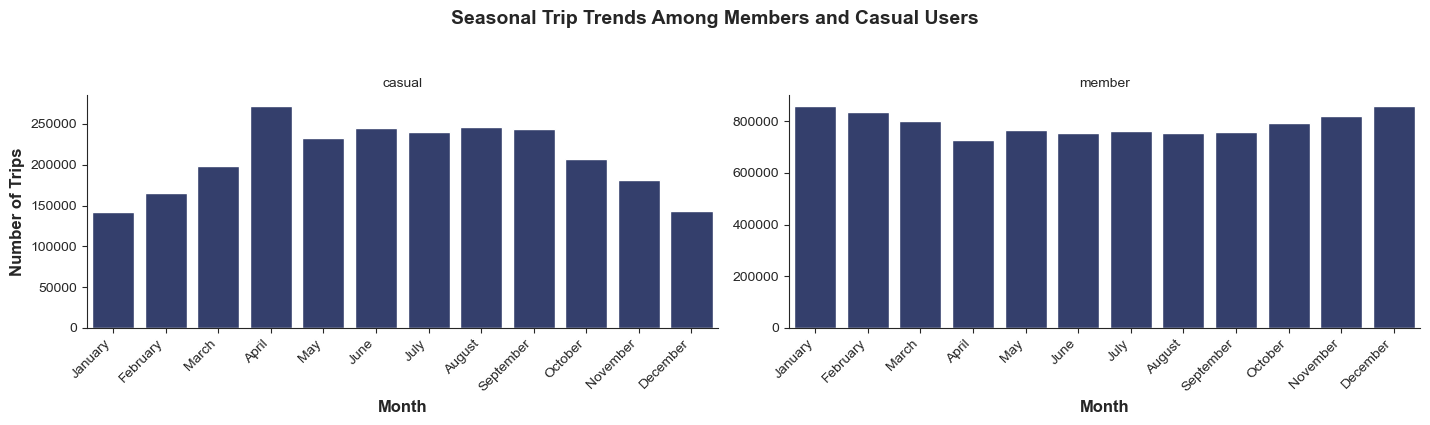

In [28]:
# Aggregating ride counts by month and user type
monthly_counts = (df.groupby(['member_casual', 'month'], observed=False)['ride_id']
      .count()
      .reset_index())

# Creating a FacetGrid
g = sns.FacetGrid(monthly_counts, col='member_casual', height=4, aspect=1.8, sharey=False)

# Mapping barplot onto each facet
g.map_dataframe(
    sns.barplot, x='month', y='ride_id',
    order=['January','February','March','April','May','June',
        'July','August','September','October','November','December'])

# Title and labels
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Number of Trips", fontsize=12, weight='bold')

# Rotate x‑axis labels on each facet
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle("Seasonal Trip Trends Among Members and Casual Users", y=1.05, fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

This FacetGrid visualization separates monthly trip counts into **two panels - one for casual riders and one for members**, making it easy to compare how each group uses the service across the year. By applying the same bar‑chart structure and consistent axes to both facets, the chart highlights seasonal patterns without crowding the information into a single plot.

The **casual‑rider panel shows a pronounced seasonal surge: trips climb steadily from winter into spring, peak during the warm months, and then taper off sharply in the fall**. This pattern reflects leisure‑oriented behavior, with casual users riding most frequently during pleasant weather and tourist-heavy months. In contrast, the **member panel reveals a more stable, year‑round usage pattern. While member trips also rise in summer, the fluctuations are far less dramatic**, suggesting that members rely on the service for regular, routine travel rather than seasonal recreation.

By splitting the data into facets, the visualization makes these contrasting behaviors immediately visible, illustrating how the bike‑share system supports both consistent commuter demand and highly seasonal recreational use.

In [29]:
# Saving the file

df.to_pickle('NY_data_merged_seaborn.pkl')